# Data Project: Sustainable Returns

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)     
- 2. [Presentation of Data](#toc2_)    
- 3. [Data Analysis](#toc3_)    
- 4. [Conclusion](#toc4_) 

# 1. <a id='toc1_'></a>[Introduction](#toc0_)

For this project, we want to investigate whether high ESG scores has a positive effect for returns on stocks. ESG is short for environmental, social and governance and is a measure of sustainability. The amount and awareness of ESG investments has grown a lot in recent years, and it is a great tool for investors when making sustainable investments decisions as it is very easy to find information of companies’ ESG strategies and scores. 

We have found ESG scores through Refinitiv, which gives an overall score from 1-100 based on the companies’ own ESG reports. The score is based on how well the company fulfills the ESG criteria, which extends over subjects such as emissions, human rights, workforce, management and corporate social responsibility strategy. 

In this data project, we investigate if there is a correlation between a given firm's ESG score and the return their stocks as well as the volatility.

# 2. <a id='toc2_'></a>[Presentation of Data](#toc0_)

First of all, we import the required packages and store them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates

We have then loaded ESG scores for 15 different companies from the Danish C25 index. The respective companies and ESG scores are first printed, and then presented in the bar graph below.

        Companies  ESG Score
0    Novo Nordisk         85
1             DSV         81
2          Orsted         76
3       Carlsberg         77
4      Jyske Bank         53
5         Pandora         77
6           Tryg          68
7          Maersk         71
8       Coloplast         75
9     Danske Bank         75
10       Rockwool         69
11         Vestas         73
12  Royal Unibrew         62
13  GN Store Nord         74
14         Demant         56


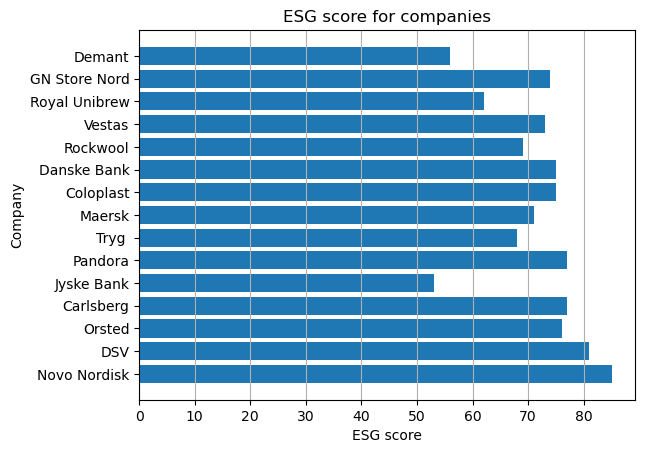

In [3]:
# read the csv-file including data of the ESG scores of 15 danish companies
df = pd.read_csv('Companies ESG scores.csv', delimiter=";")
print(df) # print the data

# create a bar plot illustrating the ESG scores of the companies
fig, ax = plt.subplots()
ax.barh(df['Companies'], df['ESG Score'])
ax.set_xlabel('ESG score')
ax.set_ylabel('Company')
ax.set_title('ESG score for companies')
ax.xaxis.grid(True)
plt.show()

From the ESG scores, it is clear to see, that Novo Nordisk and DSV scores highest with values of 85 and 81. A lot of the other companies span around 68-77, while the lowest are Jyske Bank, Demant and Royal Unibrew with an ESG score of 53, 56 and 62, respectively. From the Refinitiv website, it is stated that ESG scores > 50 "indicates good relative ESG performance and above average degree of transparency in reporting material ESG data publicly" and ESG scores > 75 "indicates excellent relative ESG performance and high degree of transparency in reporting material ESG data publicly". This means that all the chosen companies has good ESG performance, while a few has excellent ESG performance. 

This is an expected result as danish companies in general have a large focus on sustainablility in all the ways the ESG score is meassured. 

Other than ESG scores, we have also loaded every company’s monthly stock price from the 1st of May 2018 until the 1st of April 2023. From this data, we have taken the log prices as it makes the stock prices comparable in a plot since stock prices can vary greatly across firms. We then calculate the log difference in prices and also derive their average monthly return.

Below we have written code that produces plots for the log prices and log differences for the period in order to present the additional component of our data.

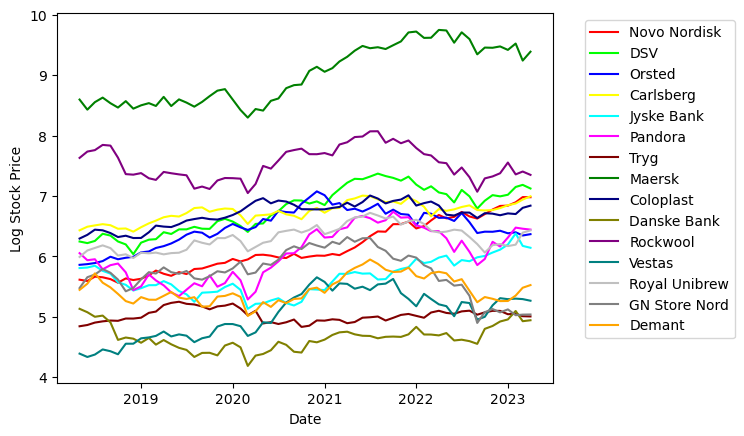

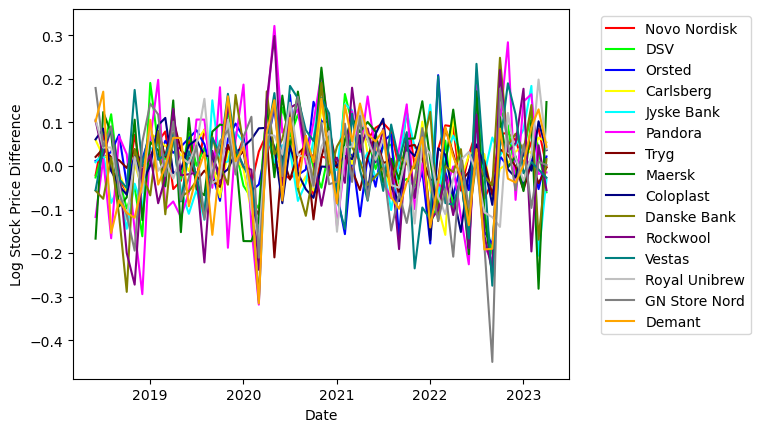

In [4]:
# read the csv-file including data of the monthly stock prices over the past five years
df1 = pd.read_csv('Monthly prices.csv', delimiter=';')

# convert date column to pandas datetime type
df1['Date'] = pd.to_datetime(df1['Date'])

# compute log prices for each company
log_prices = np.log(df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']])

# replace original prices with log prices
df1[['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']] = log_prices

# define a list of colors to use
colors = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#800000', '#008000', '#000080', '#808000', '#800080', '#008080', '#C0C0C0', '#808080', '#FFA500']

# plot the log prices 
fig, ax = plt.subplots()
ax.set_xlabel('Date')

# format the dates
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Log Stock Price')

# loop over the companies giving them different colors in the plot
for i, company in enumerate(['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']):
    ax.plot(df1['Date'], df1[company], label=company, color=colors[i])

# add and adjust the size of the legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

# compute log difference
log_diff = log_prices.diff().dropna()
# set index to Date column of df1 (excluding the first row)
log_diff.index = df1['Date'][1:] 

# plot the log difference
fig, ax = plt.subplots()
ax.set_xlabel('Date')
locator = mdates.AutoDateLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Log Stock Price Difference')
for i, company in enumerate(['Novo Nordisk', 'DSV', 'Orsted', 'Carlsberg', 'Jyske Bank', 'Pandora', 'Tryg', 'Maersk', 'Coloplast', 'Danske Bank', 'Rockwool', 'Vestas', 'Royal Unibrew', 'GN Store Nord', 'Demant']):
    ax.plot(log_diff.index, log_diff[company], label=company, color=colors[i])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


The first plot is the logarithmic stock prices of the 15 companies. When dealing with financial data, log prices are often used, as it smoothes out short term fluctuations and provides a clearer picture of the overall trends. Other than that, it is easier to compare the different companies, as their level of price is different.

We then calculate the log price differences in order to see visualize the volatility of the fifteen companies. Since we are looking at monthly data, we cannot see the flucuations in differences in prices within a month, and at the same time the flucuations might be larger since it is the differences for a whole month. Since we have a lot of companies in the plot, it is not entirely clear how volatile each company is, however this will be analysed futher in the analysis section of the project. 

# 3. <a id='toc3_'></a>[Data Analysis](#toc0_)

From the average monthly returns derived above as well as the ESG scores, we now create a scatter plot of these data points, which illustrates the relationship between each company's average monthly return and their corresponding ESG score.

Novo Nordisk     2.315210
DSV              1.487937
Orsted           0.860728
Carlsberg        0.955115
Jyske Bank       0.569273
Pandora          0.660972
Tryg             0.275957
Maersk           1.343395
Coloplast        0.923066
Danske Bank     -0.321266
Rockwool        -0.476539
Vestas           1.484826
Royal Unibrew    0.746125
GN Store Nord   -0.742255
Demant           0.134878
dtype: float64


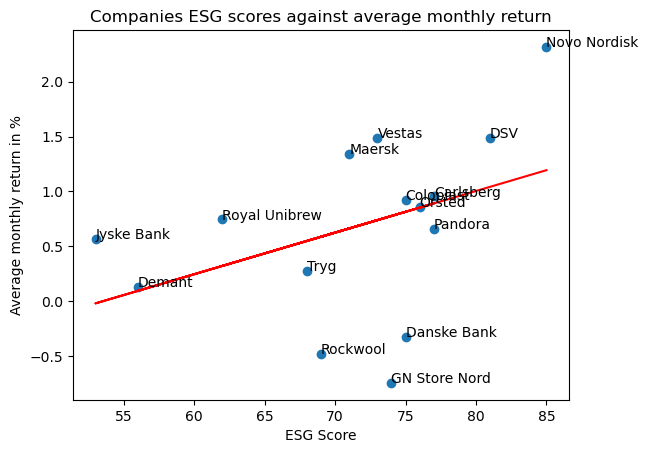

The slope of the trendline is: 0.04


In [5]:
# compute the average of the log diff prices
avg_log_diff_prices = log_diff.mean()*100

print(avg_log_diff_prices)
# create a scatter plot plotting ESG scores against the average log diff prices of the companies
plt.scatter(df['ESG Score'], avg_log_diff_prices)
# add annotations
for i, txt in enumerate(df['Companies']):
    plt.annotate(txt, (df['ESG Score'][i], avg_log_diff_prices[i]))
# include a linear regression line
x = df['ESG Score']
y = avg_log_diff_prices
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.xlabel('ESG Score')
plt.ylabel('Average monthly return in %')
plt.title('Companies ESG scores against average monthly return')
plt.show()

print('The slope of the trendline is: {:.2f}'.format(m))


The plot shows that in the case of these fifteen firms, the ones with a high ESG score tend to have a higher average return on a monthly basis. The majority of the chosen firms are placed relatively close to the trendline, but some of the firms (Danske Bank and GN Store Nord) have a decent ESG score and a negative monthly return in the period. These outliers are somewhat equalized by Novo Nordisk, that achieves both a high ESG score and high returns. 

The slope of the trendline is calculated to be 0.04 percantage points, which indicates that (for these fifteen firms) a hypothetical increase of 10 to the ESG score would increase the average monthly return by 0.4 percentage points.

We now plot the standard deviation (a measure for volatility) against the ESG scores in a scatter plot similar to the one above.

Novo Nordisk     42.410696
DSV              37.575145
Orsted           30.978033
Carlsberg        15.321004
Jyske Bank       29.132237
Pandora          41.822670
Tryg             10.622930
Maersk           47.060665
Coloplast        19.851573
Danske Bank      20.096649
Rockwool         26.934839
Vestas           38.347653
Royal Unibrew    20.393026
GN Store Nord    36.135322
Demant           21.973992
dtype: float64


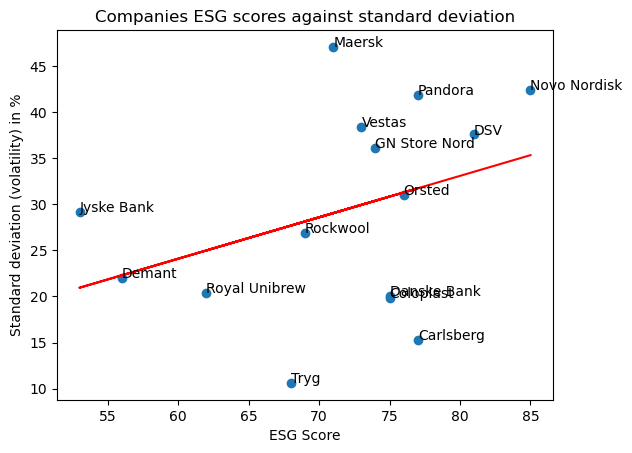

The slope of the trendline is: 0.4493


In [6]:
# compute standard deviations of the log prices of the companies in percent
sd = np.std(log_prices)*100
print(sd)

# create a scatter plot plotting ESG scores against the standard deviations
plt.scatter(df['ESG Score'], sd)
# add annotations
for i, txt in enumerate(df['Companies']):
    plt.annotate(txt, (df['ESG Score'][i], sd[i]))
# include a linear regression line
x = df['ESG Score']
y = sd
n, b = np.polyfit(x, y, 1)
plt.plot(x, n*x + b, color='red')
plt.xlabel('ESG Score')
plt.ylabel('Standard deviation (volatility) in %')
plt.title('Companies ESG scores against standard deviation')
plt.show()

print('The slope of the trendline is: {:.4f}'.format(n))

The plot shows the relationship between ESG scores and volatility for each of the 15 companies. Furthermore, we have added a trendline, which has a slope of 0.45 percentage points, meaning that an increase in in the ESG score of 10 would increase the standard deviation (volatility) with 4.5 percentage points (for these fifteen companies). 

The dispertion is quite large and only few of the firms fit the trendline, which mean that the relationship between our two axes might not be as strong.


We now plot the standard deviation (a measure for volatility) against the average monthly returns in a scatter plot similarly to the previous ones.

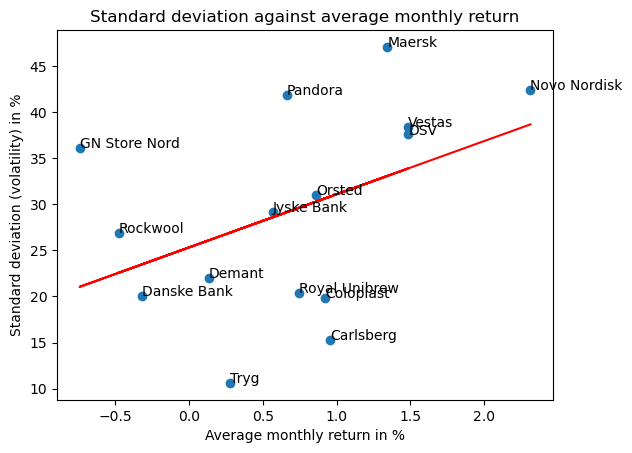

The slope of the trendline is: 5.7641


In [8]:
# create a scatter plot plotting ESG scores against the standard deviations
plt.scatter(avg_log_diff_prices, sd)
# add annotations
for i, txt in enumerate(df['Companies']):
    plt.annotate(txt, (avg_log_diff_prices[i], sd[i]))
# include a linear regression line
x = avg_log_diff_prices
y = sd
s, b = np.polyfit(x, y, 1)
plt.plot(x, s*x + b, color='red')
plt.xlabel('Average monthly return in %')
plt.ylabel('Standard deviation (volatility) in %')
plt.title('Standard deviation against average monthly return')
plt.show()

print('The slope of the trendline is: {:.4f}'.format(s))

The plot shows the relationship between average monthly return and the standard deviation (volatility). The trendline has a slope of 5.76 percantage points, meaning that a one percentage point increase in the log average monthly return would result in an increase 5.76 percentage point in the standard deviation. This indicates that there is a possible relationship between a higher monthly return and a higher volatility for these fifteen companies.

However, just as in the previous scatterplot the dispertion around the trendline is quite large, meaning that the relationship might not be as strong.  

# 4. <a id='toc4_'></a>[Conclusion](#toc0_)

From the data project, we can conclude that there seems to be a positive relationship between ESG score and the average monthly return for these 15 companies. Furthermore, we looked into the relationship between average monthly return and the standard deviation (volatility), which showed a positive, but weak relationship. 

Skal vi lave årsagsforklaringer? f.eks. positiv sammenhæng mellem esg score og afkast skyldes at 'gode' virksomheder vægter bæredygtighed højt eller andet?